In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import EEGAnalysis as ea

help(ea.loadsplitdata)

Help on function loadsplitdata in module EEGAnalysis:

loadsplitdata(sgchdir, chidx, fs, markername='grating', marker_bias=None, _import_date='all', _roi_head=-2)
    wrapper for loading split data
    
    Syntax: SplitDataContainer = loadsplitdata(sgchdir, chidx, fs, markername, marker_bias, _import_date, _roi_head)
    
    Key Arguments:
    sgchdir       -- (str) path of SgCh folder
    chidx         -- (int) target channel index (start from 0)
    fs            -- (float) sampling frequency
    markername    -- (str) marker name [default: "grating"]
    marker_bias   -- (str) file name of marker_bias.csv [default: None]
    _import_date  -- (list) explicitly import data from certain date [default: "all"]
    _roi_head     -- (float) the roi range would be (_roi_head, ITI);
                     specially, for "grating", _roi_head should be larger than -3 [default: -2]
    
    Notes:
    # check the ch_erp shape to validate the result.
    # for each date, each mode, there would b

In [3]:
datacontainer_split = ea.loadsplitdata(
    sgchdir="../Data/Chen Zhou/EEG/SgCh",
    chidx=98,
    fs=2000,
    markername = "grating",
    marker_bias = "marker_bias.csv",
    _import_date = ["180829"],
    _roi_head = -2                    
)

In [10]:
selection = "5"
tspec = np.linspace(-2, 5, (5+2)*2000)  #NOTE: roi specification, used by blocks below

np.shape(datacontainer_split.ch_erp[selection])

(60, 14000)

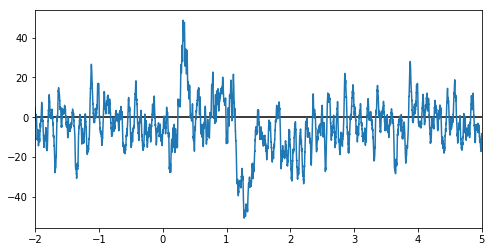

In [12]:
erp = np.mean(datacontainer_split.ch_erp[selection], 0)
erp = np.reshape(erp, (1, np.size(erp)))
plt.figure(figsize=(8,4))
plt.plot(tspec, erp[0,:]) 
# plt.plot(tspec, datacontainer_split.ch_erp[selection][3,:], alpha=0.2)
plt.hlines(0, -5, 5)
plt.xlim([-2, 5])
plt.show()

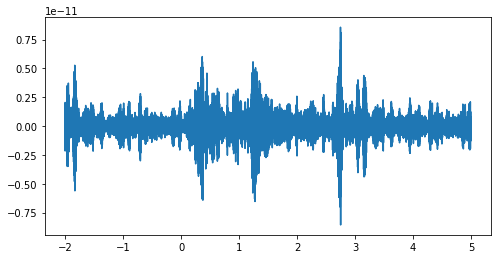

In [7]:
phaselock = datacontainer_split.ch_erp[selection] - erp

plt.figure(figsize=(8,4))
# plt.plot(tspec, datacontainer_split.ch_erp[selection][3,:], alpha=0.3)
# plt.plot(tspec, phaselock[3,:], alpha=0.5)
plt.plot(tspec, np.sum(phaselock, 0))
plt.show()

CPU times: user 2.63 s, sys: 446 ms, total: 3.08 s
Wall time: 1.63 s
CPU times: user 397 ms, sys: 97.2 ms, total: 494 ms
Wall time: 325 ms
CPU times: user 3.05 s, sys: 514 ms, total: 3.56 s
Wall time: 1.96 s
CPU times: user 426 ms, sys: 214 ms, total: 640 ms
Wall time: 508 ms
CPU times: user 57.3 ms, sys: 9.58 ms, total: 66.8 ms
Wall time: 34.8 ms
CPU times: user 25.6 ms, sys: 17.8 ms, total: 43.4 ms
Wall time: 21.7 ms


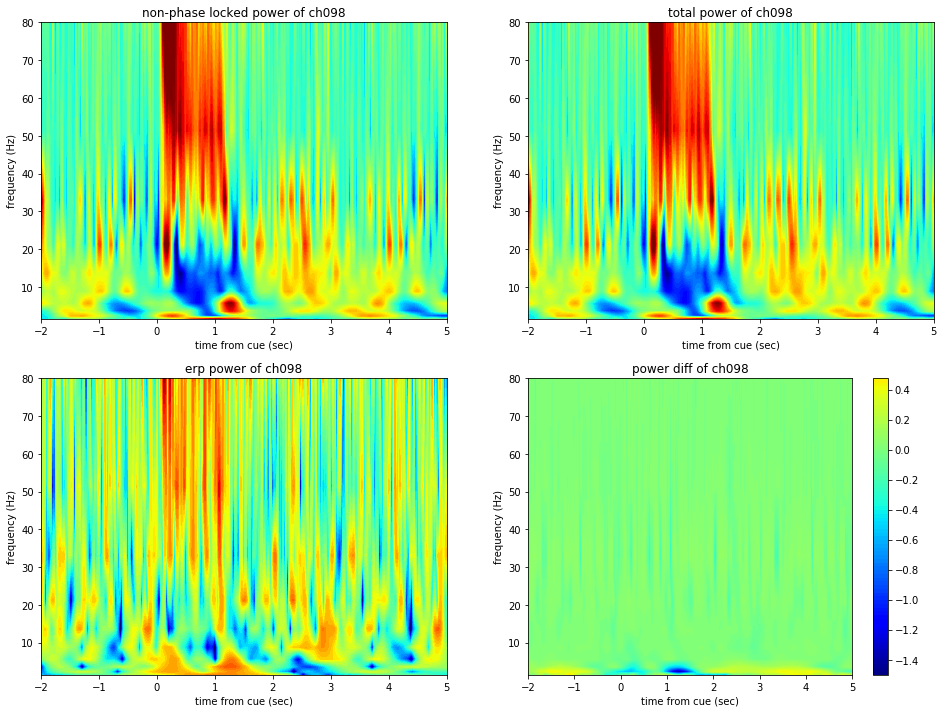

In [8]:
# numpy
frange = np.logspace(np.log10(1.5), np.log10(80), 10)
plt.figure(figsize=(16,12))

#
plt.subplot(2,2,1)
%time kk = ea.decomposition.dwt.dwt(data=phaselock, frange=frange, fs=2000, reflection=True)
%time kk_totalpwr = ea.power.dwt_power(kk, fs=2000, zscore=True)

plt.contourf(tspec, frange, kk_totalpwr, 80, cmap=plt.get_cmap("jet"))
plt.clim([-3,3])
plt.title("non-phase locked power of ch%03d"%datacontainer_split.chidx)
plt.xlabel("time from cue (sec)")
plt.ylabel("frequency (Hz)")

#
plt.subplot(2,2,2)
%time kk_prime = ea.decomposition.dwt.dwt(data=datacontainer_split.ch_erp[selection], frange=frange, fs=2000, reflection=True)
%time kk_totalpwr2 = ea.power.dwt_power(kk_prime, fs=2000, zscore=True)

plt.contourf(tspec, frange, kk_totalpwr, 80, cmap=plt.get_cmap("jet"))
plt.clim([-3,3])
plt.title("total power of ch%03d"%datacontainer_split.chidx)
plt.xlabel("time from cue (sec)")
plt.ylabel("frequency (Hz)")

plt.subplot(2,2,3)
%time kk_erp = ea.decomposition.dwt.dwt(data=erp, frange=frange, fs=2000, reflection=True)
%time kk_totalpwr_erp = ea.power.dwt_power(kk_erp, fs=2000, zscore=True)

plt.contourf(tspec, frange, kk_totalpwr_erp, 80, cmap=plt.get_cmap("jet"))
plt.clim([-3,3])
plt.title("erp power of ch%03d"%datacontainer_split.chidx)
plt.xlabel("time from cue (sec)")
plt.ylabel("frequency (Hz)")

plt.subplot(2,2,4)
plt.contourf(tspec, frange, kk_totalpwr-kk_totalpwr2, 80, cmap=plt.get_cmap("jet"))
plt.clim([-1.5,1.5])
plt.title("power diff of ch%03d"%datacontainer_split.chidx)
plt.xlabel("time from cue (sec)")
plt.ylabel("frequency (Hz)")
plt.colorbar()

plt.show()

CPU times: user 400 ms, sys: 175 ms, total: 575 ms
Wall time: 578 ms
CPU times: user 388 ms, sys: 169 ms, total: 556 ms
Wall time: 558 ms


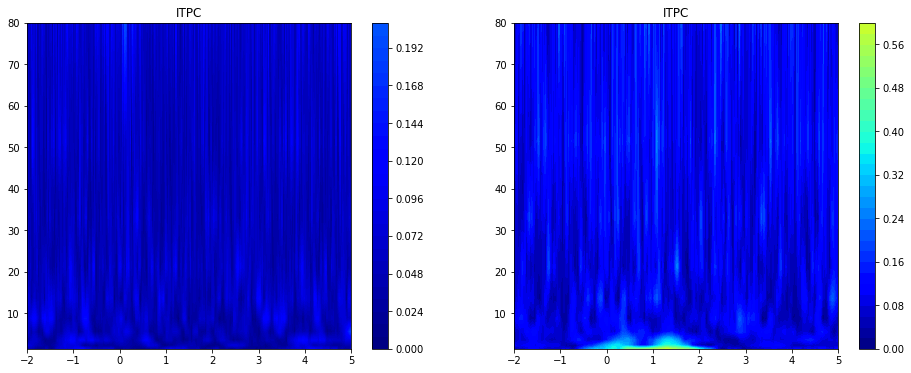

In [15]:
%time kk_itpc = ea.phase.dwt_itpc(kk)  # 计算itpc值
%time kk_prime_itpc = ea.phase.dwt_itpc(kk_prime)

plt.figure(figsize=(16,6))

plt.subplot(1,2,1)
plt.contourf(tspec, frange, kk_itpc, 30, cmap=plt.get_cmap("jet"))
plt.clim([0,1])
plt.colorbar(extend="both")
plt.title("ITPC")

plt.subplot(1,2,2)
plt.contourf(tspec, frange, kk_prime_itpc, 30, cmap=plt.get_cmap("jet"))
plt.clim([0,1])
plt.colorbar(extend="both")
plt.title("ITPC")

plt.show()